In [1]:
#载入所需的库
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from snownlp import SnowNLP
import jieba
import jieba.analyse
import seaborn as sns
from wordcloud import WordCloud
from imageio import imread

# 数据概览

In [5]:
pdd_data=pd.read_csv(r'/Users/jiabaohuang/python/项目/互联网大厂职位评价数据分析 /知乎拼多多热门问题详细答案前100个.csv')
pdd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   问题内容      5761 non-null   object
 1   问题标签      6940 non-null   object
 2   问题回答数     6940 non-null   int64 
 3   问题浏览数     6940 non-null   int64 
 4   问题评论数     6940 non-null   int64 
 5   问题关注数     6940 non-null   int64 
 6   问题ID      6940 non-null   int64 
 7   问题标题      6940 non-null   object
 8   问题链接      6940 non-null   object
 9   提问时间      6940 non-null   object
 10  问题最新编辑时间  6940 non-null   object
 11  回答ID      6940 non-null   int64 
 12  链接        6940 non-null   object
 13  作者        6938 non-null   object
 14  回答内容      6939 non-null   object
 15  评论数量      6940 non-null   int64 
 16  赞同数量      6940 non-null   int64 
 17  回答时间      6940 non-null   object
 18  编辑时间      6940 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.0+ MB


In [4]:
pdd_data.columns

Index(['问题内容', '问题标签', '问题回答数', '问题浏览数', '问题评论数', '问题关注数', '问题ID', '问题标题',
       '问题链接', '提问时间', '问题最新编辑时间', '回答ID', '链接', '作者', '回答内容', '评论数量', '赞同数量',
       '回答时间', '编辑时间'],
      dtype='object')

In [11]:
# 提取问题数据
pdd_questions = pdd_data.drop_duplicates(['问题ID'])
pdd_questions.head()

,问题内容,问题标签,问题回答数,问题浏览数,问题评论数,问题关注数,问题ID,问题标题,问题链接,提问时间,问题最新编辑时间,回答ID,链接,作者,回答内容,评论数量,赞同数量,回答时间,编辑时间
0,我朋友刚刚大学毕业2年，211大学背景，从北京来上海发展，之前在的那家公司是上市公司，现在他...,"求职,offer 比较",175,4826208,9,2405,48162093,我朋友拿到了拼多多的offer，有在拼多多工作的同学吗？可以给点意见吗？,https://www.zhihu.com/question/48162093,2016-7-5 9:30:03,2016-7-5 9:30:03,1662372357,https://www.zhihu.com/question/48162093/answer...,李盟,"<p></p><figure data-size=""normal""><noscript><i...",0,0,2021-1-5 16:36:15,2021-1-5 16:36:15
11,<p>最近在脉脉看到很多拼多多离职员工吐槽离职后拿不到离职证明的帖子，其中有一个帖子下面已经...,"离职,脉脉,拼多多,被离职",452,3200614,36,3150,408873251,如何看待拼多多离职员工在脉脉上的吐槽？,https://www.zhihu.com/question/408873251,2020-7-24 10:27:17,2020-7-24 11:17:03,1671765410,https://www.zhihu.com/question/408873251/answe...,薄荷,<p>天下乌鸦一般黑...星星之火真的可以燎原吗...... </p>,0,0,2021-1-11 10:09:06,2021-1-11 10:09:06
145,<p>我想知道的有两点，第一个是他会被拼多多起诉吗？如果万一起诉能打赢官司吗？第二点是大家觉...,"法律,职场,加班,996,拼多多",36,37529,0,106,438797786,如何看待拼多多被辞退员工王太虚发布视频抵制拼多多？他会被拼多多诉讼吗？,https://www.zhihu.com/question/438797786,2021-1-10 23:29:09,2021-1-11 10:50:41,1671818109,https://www.zhihu.com/question/438797786/answe...,风烨,<p>“聚沙成塔，滴水穿石”的关键在于要持续、持久，如果聚了没几下就被风吹走了，滴了没几下就...,0,0,2021-1-11 10:38:08,2021-1-11 10:38:08
743,"<p></p><figure data-size=""normal""><img src=""ht...","热门新闻,新闻,时事新闻,跳楼自杀,拼多多",123,447930,14,548,438616022,如何看待拼多多又一员工跳楼?,https://www.zhihu.com/question/438616022,2021-1-9 19:06:05,2021-1-10 19:52:26,1671885729,https://www.zhihu.com/question/438616022/answe...,MarsPoliBie,<p>没有问题，</p><p>非常幸福，</p><p>之前过于激动被关了24小时，我的。</...,1,0,2021-1-11 11:14:28,2021-1-11 11:14:28
767,"<p></p><figure data-size=""normal""><img src=""ht...","公共厕所,厕所,拼多多",769,5616893,84,3133,411147827,如何看待拼多多被曝员工因厕所坑位不足，在小便池里拉屎？,https://www.zhihu.com/question/411147827,2020-7-31 16:42:12,2020-8-11 17:09:45,1668082301,https://www.zhihu.com/question/411147827/answe...,两天,"<p>殡夕夕的问题，pdd自己能解决。</p><figure data-size=""norm...",0,0,2021-1-8 20:58:20,2021-1-8 20:59:18


In [8]:
# 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

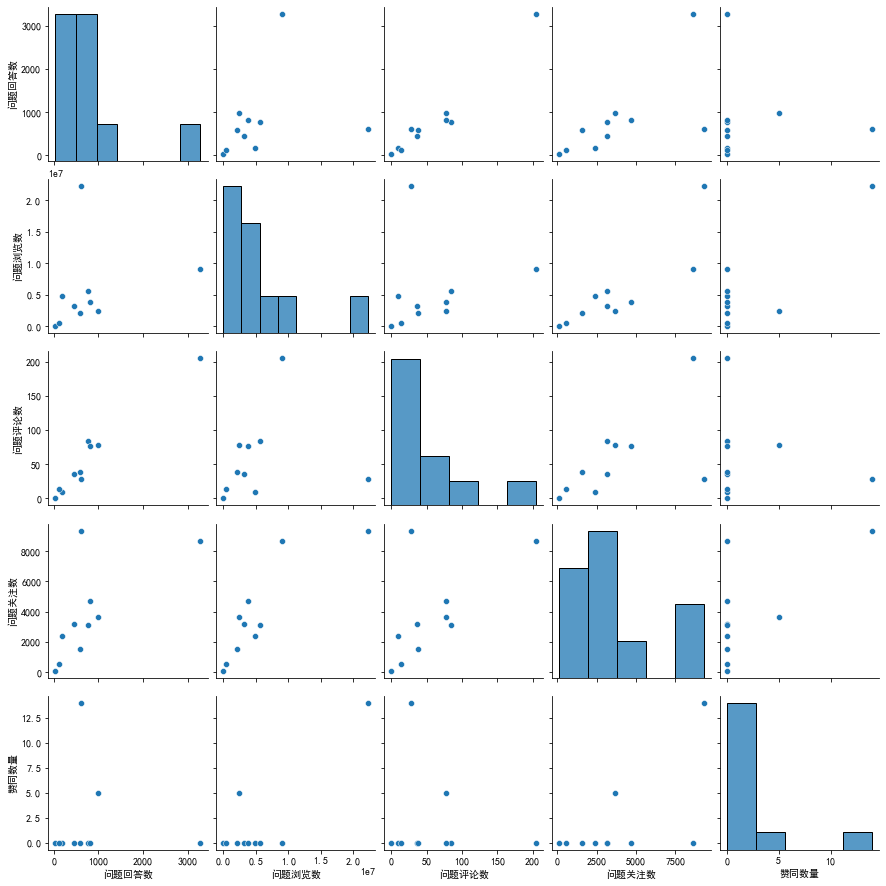

In [9]:
#问题相关主要数据的可视化展示
sns.pairplot(pdd_questions.loc[:,['问题回答数','问题浏览数','问题评论数','问题关注数','赞同数量',]])

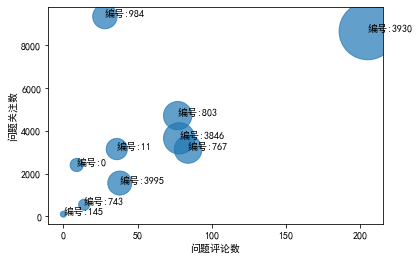

In [18]:
plt.scatter(pdd_questions.问题评论数,pdd_questions.问题关注数,s=pdd_questions.问题回答数,alpha=0.7)
plt.xlabel('问题评论数')
plt.ylabel('问题关注数')
for i in pdd_questions.iterrows():
    plt.text(i[1].问题评论数,i[1].问题关注数, '编号:%s' % i[0])

从上图可以看出，拼多多相关问题中，3930号明显获得了更多的关注、更多的回复和评论，下面我们来看下问题的具体内容

In [22]:
pdd_questions.loc[3930,['问题标题','问题内容']]

问题标题          如何看待拼多多回应员工离世：「我们心痛如绞，我们爱你，深深的想念你」，你有什么想说的？
问题内容    <p>1月4日讯，12月29日，拼多多员工下班回家路上突然昏厥倒地，抢救无效去世。对此，拼多...
Name: 3930, dtype: object

In [23]:
pdd_questions.问题标题

0              我朋友拿到了拼多多的offer，有在拼多多工作的同学吗？可以给点意见吗？
11                              如何看待拼多多离职员工在脉脉上的吐槽？
145             如何看待拼多多被辞退员工王太虚发布视频抵制拼多多？他会被拼多多诉讼吗？
743                                  如何看待拼多多又一员工跳楼?
767                     如何看待拼多多被曝员工因厕所坑位不足，在小便池里拉屎？
803              如何看待 1 月 7 日拼多多又一员工被救护车拉走，经诊断为肠痉挛？
984                            在拼多多工作的同学来说说这家公司怎么样？
3846      如何看待拼多多员工猝死后，劳动监察部门将调查拼多多用工情况？将对用工环境有何影响？
3930    如何看待拼多多回应员工离世：「我们心痛如绞，我们爱你，深深的想念你」，你有什么想说的？
3995                            拼多多的成功是不是这个社会最大的讽刺？
Name: 问题标题, dtype: object

问题大多是有关pdd1月份的员工事件

In [25]:
#读取其他互联网大厂知乎问题数据，以下操作类比拼多多数据
bat_data=pd.read_csv(r'/Users/jiabaohuang/python/项目/互联网大厂职位评价数据分析 /知乎大厂offer热门问题详细答案前100个.csv.csv')

In [26]:
bat_data.columns

Index(['问题内容', '问题标签', '问题回答数', '问题浏览数', '问题评论数', '问题关注数', '问题ID', '问题标题',
       '问题链接', '提问时间', '问题最新编辑时间', '回答ID', '链接', '作者', '回答内容', '评论数量', '赞同数量',
       '回答时间', '编辑时间'],
      dtype='object')

In [29]:
bat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6487 entries, 0 to 6486
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   问题内容      4365 non-null   object
 1   问题标签      6487 non-null   object
 2   问题回答数     6487 non-null   int64 
 3   问题浏览数     6487 non-null   int64 
 4   问题评论数     6487 non-null   int64 
 5   问题关注数     6487 non-null   int64 
 6   问题ID      6487 non-null   int64 
 7   问题标题      6487 non-null   object
 8   问题链接      6487 non-null   object
 9   提问时间      6487 non-null   object
 10  问题最新编辑时间  6487 non-null   object
 11  回答ID      6487 non-null   int64 
 12  链接        6487 non-null   object
 13  作者        6487 non-null   object
 14  回答内容      6487 non-null   object
 15  评论数量      6487 non-null   int64 
 16  赞同数量      6487 non-null   int64 
 17  回答时间      6487 non-null   object
 18  编辑时间      6487 non-null   object
dtypes: int64(8), object(11)
memory usage: 963.0+ KB


In [28]:
bat_questions=bat_data.drop_duplicates(['问题ID'])

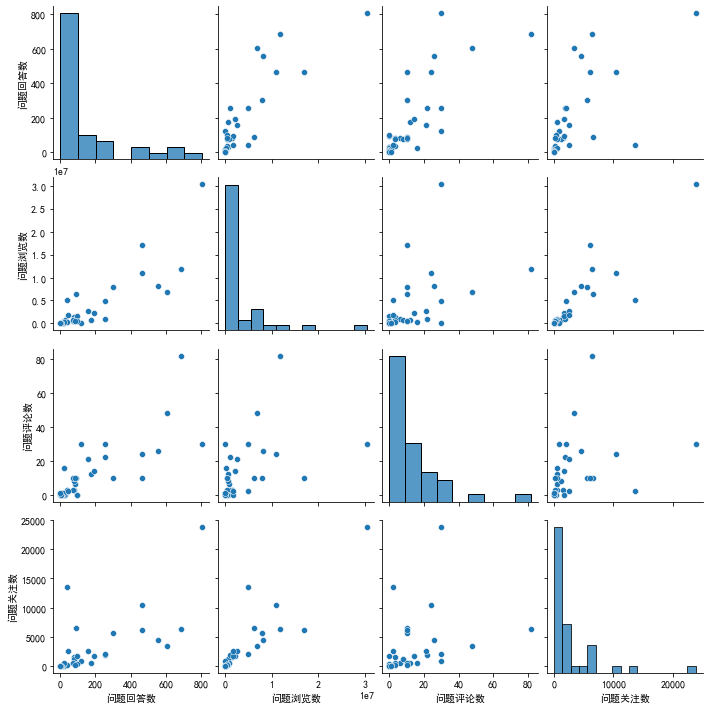

In [30]:
sns.pairplot(bat_questions.loc[:,['问题回答数','问题浏览数','问题评论数','问题关注数']]);

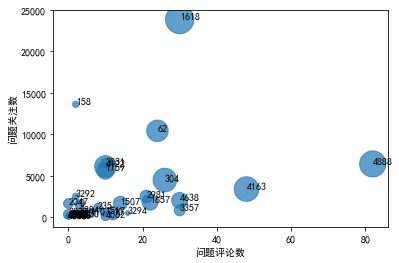

In [31]:
plt.scatter(bat_questions.问题评论数,bat_questions.问题关注数,s=bat_questions.问题回答数,alpha=0.7)
plt.xlabel('问题评论数')
plt.ylabel('问题关注数')
for i in bat_questions.iterrows():
    plt.text(i[1].问题评论数,i[1].问题关注数,i[0])

In [32]:
# 1618、4888、4163这3个较为热门的问题内容
bat_questions.loc[4888,['问题标题','问题内容']]

问题标题                                   「华为」的工资真的有传说中那么高吗？
问题内容    <p>华为工资年薪几十万几百万的大佬们，都是在华为的研发岗位，菊厂16w员工，不可能人人研发...
Name: 4888, dtype: object

In [33]:
bat_questions.loc[1618,['问题标题','问题内容']]

问题标题    你为什么从阿里巴巴集团离职？
问题内容               NaN
Name: 1618, dtype: object

In [35]:
bat_questions.loc[4163,['问题标题','问题内容']]

问题标题                          作为应届生的你，为何拒绝了华为的offer?
问题内容    <p>本人今年拿到华为财经offer，已拒，想听听各位为什么拒绝华为的offer</p>
Name: 4163, dtype: object

In [36]:
bat_questions.问题标题

0                                      为什么都说阿里 P7 的晋升是道坎？
10                     刚拿到阿里P7的offer，但阿里最近的瓜太多了，我现在去还合适吗？
48                                   各位老铁，阿里p7的薪资待遇如何，谢谢？
62                                        一毕业就能进阿里的人有多厉害？
110                               阿里巴巴和字节跳动的offer选哪个比较好呢？
158                              百度、腾讯和阿里内部的级别和薪资待遇是什么样的？
235                                  接了阿里 offer 后毁约会被拉黑吗？
304                                           阿里hr为什么那么拽？
1507                               海归35岁，阿里P7offer, 是否接受？
1517    如何看待阿里p8 ceil李超可能因评论花花董花花 被迫离职？阿里的企业文化是只针对普通员工...
1618                                       你为什么从阿里巴巴集团离职？
1657     网友因字节跳动口头 offer 放弃其它工作机会，之后公司变卦，该怎么办？如何避免同类事件发生？
1693                             你是因为什么原因最终拒绝了字节跳动的offer？
1759                                         在字节跳动工作是怎样的？
1762                                 字节跳动和BAT哪个公司的薪资待遇最好？
2047                                在「字节跳动」工作或实习是一种怎样的体验？
2884                              拿到字节跳动和腾讯的offer，应该如何抉择？
2958          

# 文本情感分析
从以上数据概览中，我们可以发现，对于拼多多相关的数据，目前大家的关注热点大多集中在员工猝死事件上，而其他大厂相关问题多数与薪酬待遇、职业发展相关。以下将通过利用snownlp这个中文文本分析库，对有以上2个数据集分别进行文本情感分析，以期探索近期拼多多事件对于大家态度情感的影响。

通过查看以上数据概览发现，由于数据来源于爬虫爬取，因此问题内容、回答内容中有较多不必要的数字、英文、甚至特殊符号，在过滤不必要的文本后，再进行情感分析。

In [38]:
r1='[a-zA-Z0-9\s+\.\!\/_,$%^*(+"\']+|[+——《》“”~@#￥%……&*（）<>:;=?-]+'  #需过滤的文本
def senti(s):  #情感分析核心函数（可过滤不必要的字符）
    if s is np.nan:  #测试发现有nan数据，运行函数报错，需将其置空
        s=''
    string=re.sub(r1,'',s)  #测试发现有的回答为纯数字或英文，这里不进行情感分析，也置空
    if string=='':
        string=' '
    score=SnowNLP(string).sentiments  #调用snownlp产生情感分析的分数（介于0，1之间，0代表负面，1代表正面）
    return score

In [40]:
#以下代码运行事件较长，因此仅运行一次后，保存结果
# pdd_data['score']=pdd_data.回答内容.apply(senti)
# bat_data['score']=bat_data.回答内容.apply(senti)

In [42]:
# f=open(r'/Users/jiabaohuang/python/项目/互联网大厂职位评价数据分析 /data.pk','wb')
# pickle.dump((pdd_data,bat_data),f)
# f.close()

In [44]:
#读取结果
f=open(r'/Users/jiabaohuang/python/项目/互联网大厂职位评价数据分析 /data.pk','rb')
pdd_data, bat_data=pickle.load(f)
f.close()

/Users/jiabaohuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiabaohuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


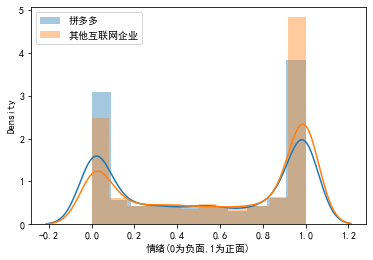

In [45]:
#在同一图中比较拼多多与其他大厂的知乎回答情绪分布
fig,ax=plt.subplots()
sns.distplot(pdd_data.score,ax=ax,label='拼多多')
sns.distplot(bat_data.score,ax=ax,label='其他互联网企业',axlabel='情绪(0为负面,1为正面)')
plt.legend();

从上图可以清晰地看出，无论是拼多多还是其他互联网大厂，数据中的情绪都体现出了正面、负面两极分化的情况，而且正面情绪还是占多数的。但是，比较拼多多相关回答与其他互联网大厂数据可以发现，拼多多相关数据负面情绪占比较高，正面情绪占比较低，推测可能是受到近期员工猝死事件影响。

# 词云可视化

由于前期分析已经发现，知乎上各条回答的情绪呈现正面、负面两极分化的情况，为了更有效地展示两种情绪的关键词，我们分别对负面情绪(<0.2)，正面情绪(>0.8)绘制词云。

## 负面情绪

In [58]:
s=''
for i in pdd_data.loc[pdd_data.score<0.2,:].回答内容:
    if i is np.nan:  #测试发现有nan数据，运行函数报错，需将其置空
        i=''
    s=s+re.sub(r1,'',i)+'。'

In [59]:
img=WordCloud(font_path='/System/Library/Fonts/STHeiti Light.ttc',
              background_color='white',
            stopwords=['但是','不是','所以','年月日','拼多多','当然','因此','年','然而','年月','最后','还有','哎','嗯'],
            scale=4).generate(s)

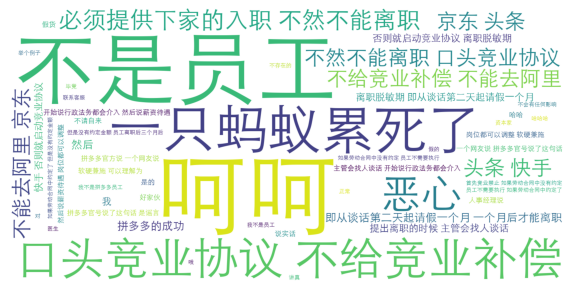

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(img,aspect='equal')
plt.axis("off");

可以发现这些多数的回答都与拼多多此次事件中对于员工的不公平处置，以及其他公司的入职协议等等有关

## 正面情绪


In [53]:
s=''
for i in pdd_data.loc[pdd_data.score>0.8,:].回答内容:
    if i is np.nan:  #测试发现有nan数据，运行函数报错，需将其置空
        i=''
    s=s+re.sub(r1,'',i)+'。'

In [54]:
img=WordCloud(font_path=r'/System/Library/Fonts/STHeiti Light.ttc',
            background_color='white',
            stopwords=['但是','不是','所以','年月日','拼多多','当然','因此','年','然而','年月','最后'],
            scale=4).generate(s)

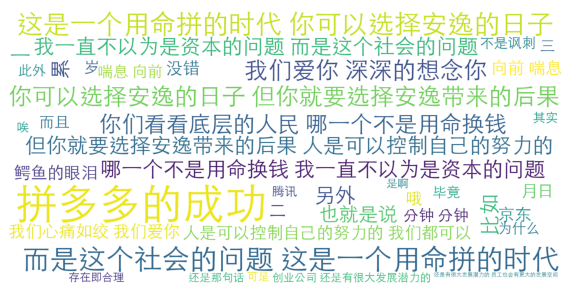

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(img,aspect='equal')
plt.axis("off");

可以发现与此同时，也有很多正面情绪，是与拼搏、努力、社会现状以及对于逝者的同情相关。